<h2 align='center'> Bike Sharing Dataset </h2>

#### Import pandas, numpy, seaborn, matplotlib.pyplot packages

In [2]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 

from warnings import filterwarnings
filterwarnings('ignore')

#### Importing  Dataset

In [3]:
df = pd.read_csv('Datasets/hour.csv')
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [48]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


**It is a Regression Problem - the Dependent variable is cnt(ie, count of total rental bikes)**

* By viewing Data we can say on Working day the count of total rental bikes(including both casual and registered) is high 

* **Shape of Dataset**

In [49]:
df.shape

(17379, 17)

* **The dataset has total 17379 rows & 17 attributes** 

* **Checking Information of Dataset**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


* Dataset has 4 Float columns, 12 integer columns and 1 object (string) Columns



## EDA 

**Plotting Histogram**

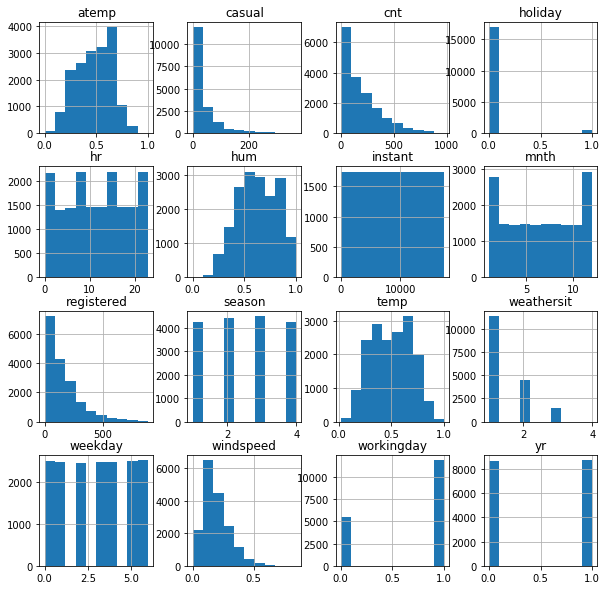

In [52]:
df.hist(figsize=(10,10))
plt.show()

### Inference from Histogram:
* Holiday, Season, weathersit, weekday, workingday, yr  are Categorical Variables which are in Encoded format
* instant is irrelevent column

### Checking outliers

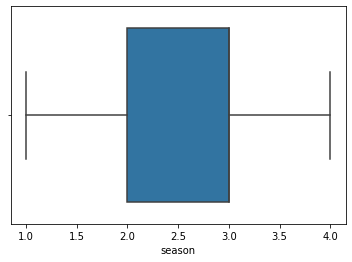

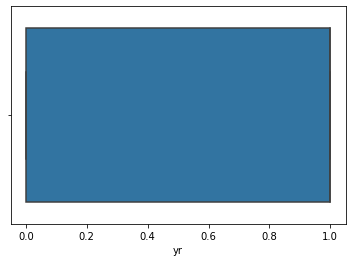

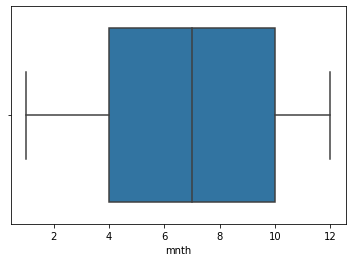

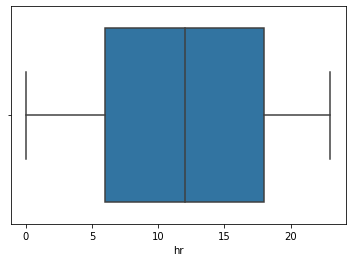

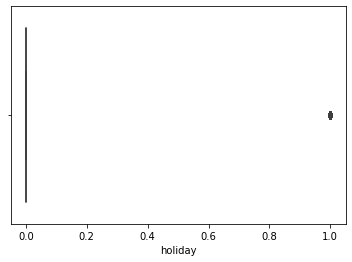

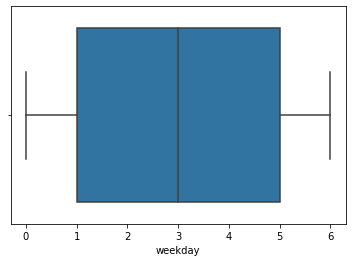

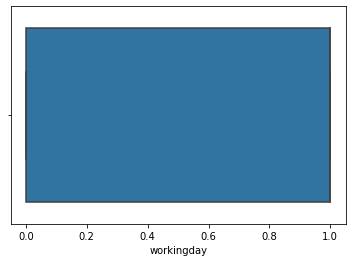

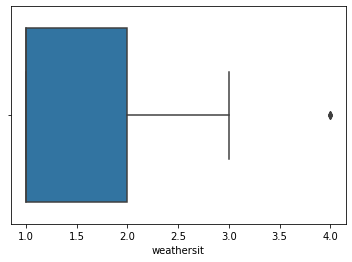

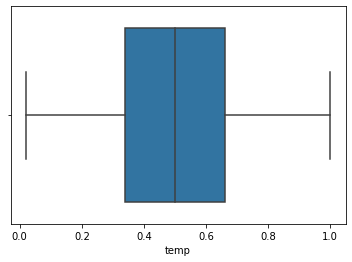

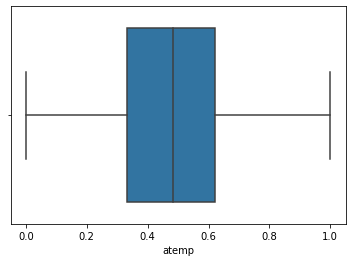

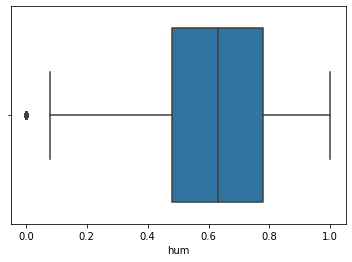

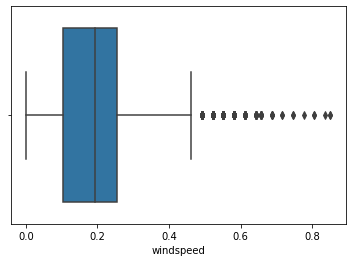

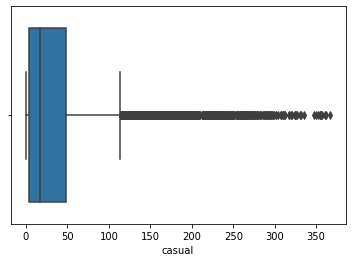

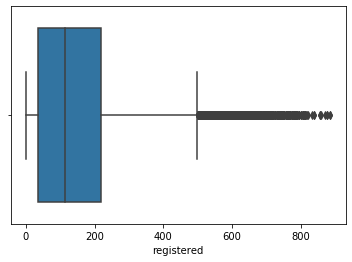

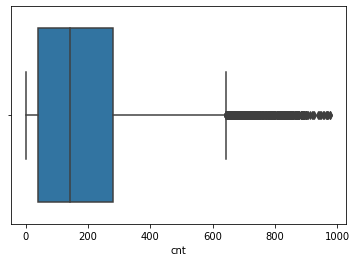

In [53]:
col = [ 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
for i in col:
    sns.boxplot(df[i])
    plt.show()

* There is single outlier in weathersit, hum
* There are moderate outliers in windspeed
* There are many outliers in casual, registered, cnt
* Others have no outlier 

### checks Distribution

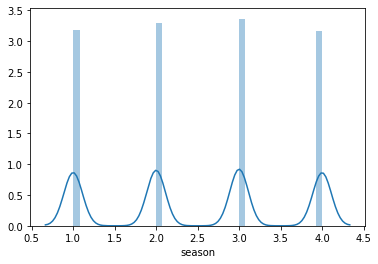

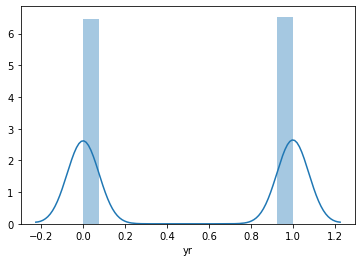

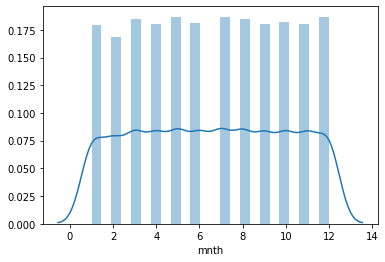

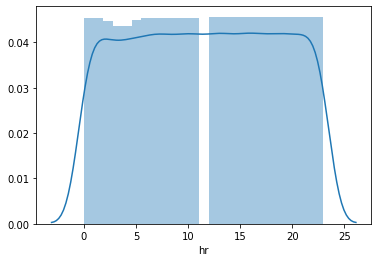

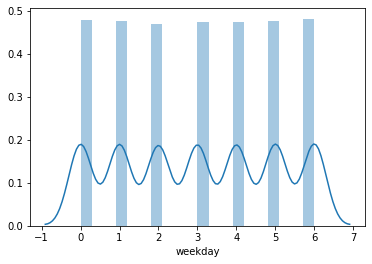

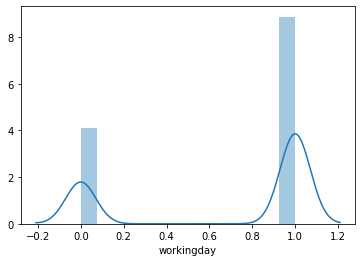

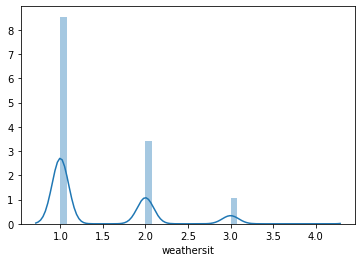

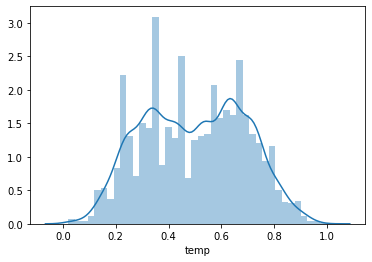

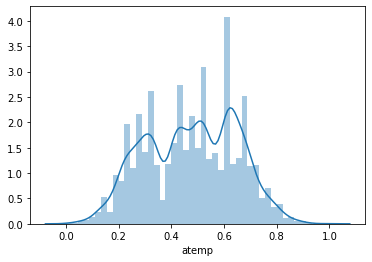

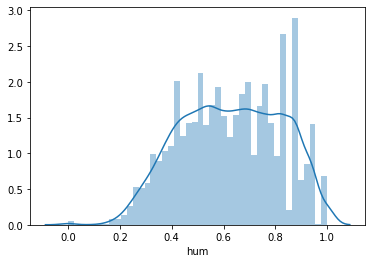

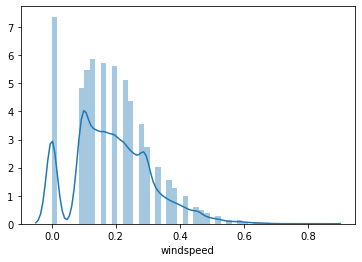

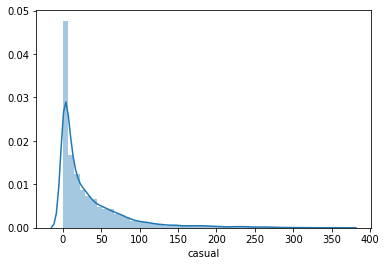

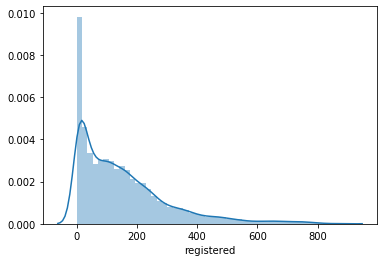

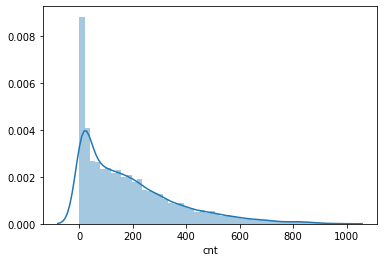

In [54]:
colm = [ 'season', 'yr', 'mnth', 'hr', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt']
for col in colm:
    sns.distplot(df[col])
    plt.show()

### Analysis

In [55]:
df['season'].value_counts()

3    4496
2    4409
1    4242
4    4232
Name: season, dtype: int64

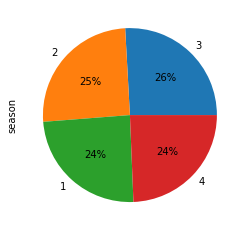

In [56]:
df['season'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

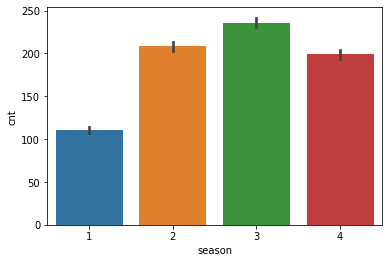

In [57]:
sns.barplot(df['season'], df['cnt'])

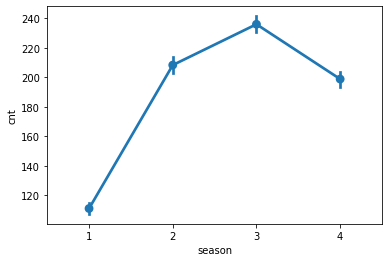

In [58]:
sns.pointplot(df['season'], df['cnt'])

In [59]:
df['yr'].value_counts()

1    8734
0    8645
Name: yr, dtype: int64

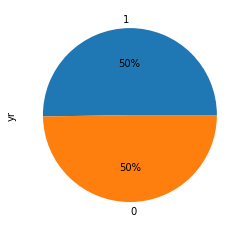

In [60]:
df['yr'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

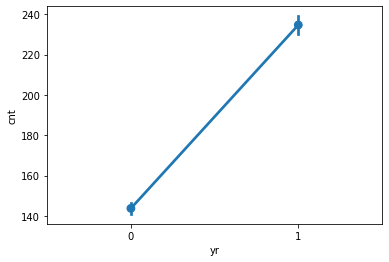

In [61]:
sns.pointplot(df['yr'], df['cnt'])

In [62]:
df['mnth'].value_counts()

7     1488
5     1488
12    1483
8     1475
3     1473
10    1451
6     1440
11    1437
9     1437
4     1437
1     1429
2     1341
Name: mnth, dtype: int64

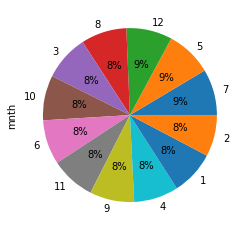

In [63]:
df['mnth'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

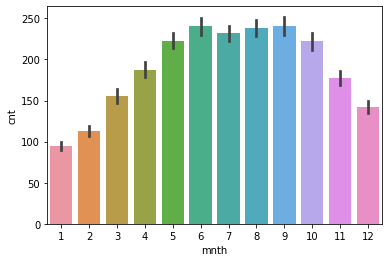

In [64]:
sns.barplot(df['mnth'], df['cnt'])

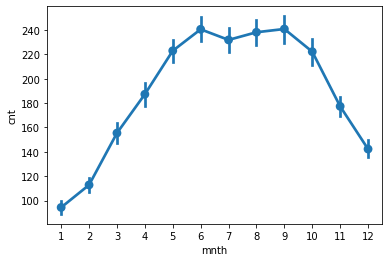

In [65]:
sns.pointplot(df['mnth'], df['cnt'])

In [66]:
df['holiday'].value_counts()

0    16879
1      500
Name: holiday, dtype: int64

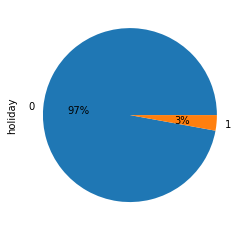

In [67]:
df['holiday'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

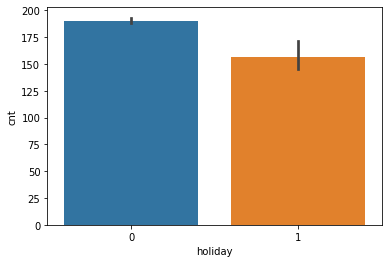

In [68]:
sns.barplot(df['holiday'], df['cnt'])

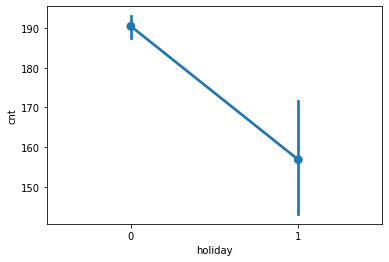

In [69]:
sns.pointplot(df['holiday'], df['cnt'])

In [70]:
df['weekday'].value_counts()

6    2512
0    2502
5    2487
1    2479
3    2475
4    2471
2    2453
Name: weekday, dtype: int64

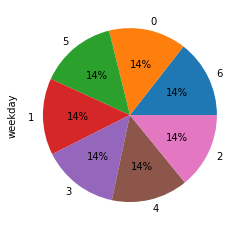

In [71]:
df['weekday'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

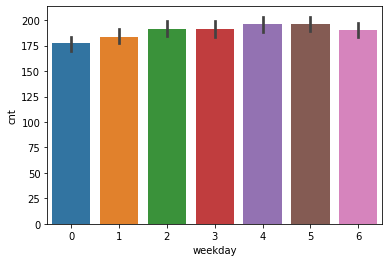

In [72]:
sns.barplot(df['weekday'], df['cnt'])

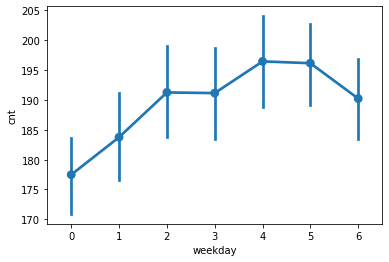

In [73]:
sns.pointplot(df['weekday'], df['cnt'])

In [74]:
df['workingday'].value_counts()

1    11865
0     5514
Name: workingday, dtype: int64

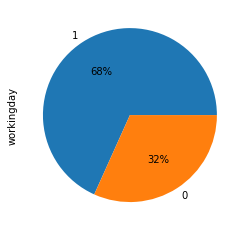

In [75]:
df['workingday'].value_counts().plot(kind='pie', autopct = "%1.0f%%")

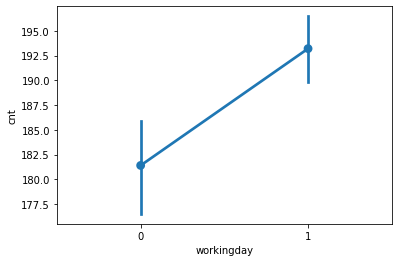

In [76]:
sns.pointplot(df['workingday'], df['cnt'])

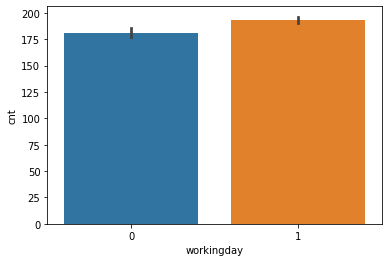

In [77]:
sns.barplot(df['workingday'], df['cnt'])

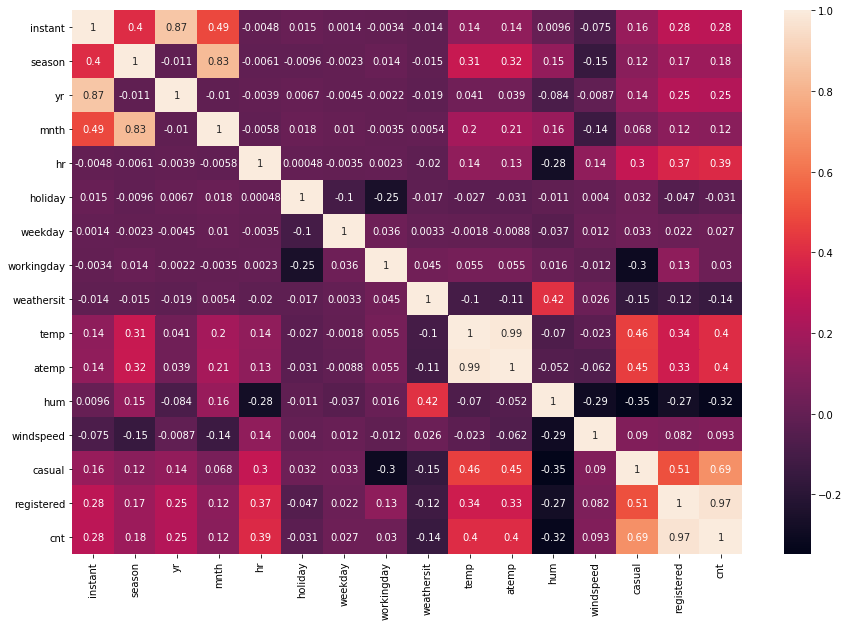

In [78]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True)

Important Varibale by correlation matrix is:
* registered, casual, hum, atemp, temp, hr is Important variable for predicting cnt

## Data preprocessing

Pre-processing techniques include:

* 1.Handling Missing Data
* 2.Removing Outliers
* 3.Encoding Categorical Text Variables
* 4.Feature Scaling

#### Check Null Values

In [51]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

- There is no Null Values

#### Now droping irrelevent columns

In [4]:
df = df.drop(['instant','dteday'], axis=1)
df.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


- There is No Object variable so, no need for label encoding/one hot encoding

### Spliting Data into x and y

In [27]:
x = df.drop(['cnt'], axis=1)
x.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1


In [28]:
y = df.iloc[:,-1:]
y.head()

,cnt
0,16
1,40
2,32
3,13
4,1


### Spliting data into test and training set

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.30)

In [30]:
print("Dataset shape:", df.shape)
print("Input Features shape: ", X_train.shape, y_train.shape)
print("Output Features shape: ", X_test.shape, y_test.shape)

Dataset shape: (17379, 15)
Input Features shape:  (12165, 14) (12165, 1)
Output Features shape:  (5214, 14) (5214, 1)


### Applying Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression
lin = LinearRegression()

#### Fitting model

In [32]:
lin.fit(X_train,y_train)

LinearRegression()

#### Predicting values

In [33]:
pred = lin.predict(X_test)

In [34]:
pred

array([[391.],
       [330.],
       [  5.],
       ...,
       [  8.],
       [ 30.],
       [300.]])

#### Finding score

In [35]:
from sklearn.metrics import r2_score

In [36]:
r2_score(y_test, pred)

1.0

#### Ploting graph for test values

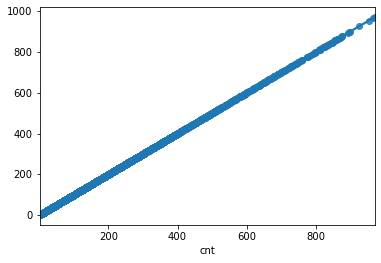

In [37]:
sns.regplot(y_test,pred)